Searching, Sorting, and Timing
==============================



## Agenda



1.  Timing
2.  Prelude: Timing list indexing
3.  Linear search
4.  Binary search
5.  Insertion sort



### Notes

Runtime Analysis -- to understand the behavior of an algorithm we want to understand how the runtime is affected by the size of its input, a relationship known as runtime complexity.

1. Empirical measurements have a lot of flaws because the inputs can vary, the machines can vary, we may observe random effects, and languages can vary.

We want to reason about the worst case, best case, and average case independnly of the environment.

How do we measure input size?
- number of bits (works for everything bc is independnt of encoding but unintuitive)
- number of elements
- size of input element (given a set number of inputs)
- multiple inputs? Use the largest input or only vary one input and consider others as constant.

BIG-O Notation
- Think about T(n) which adds up elements in a list
- Break down a function to figure out how many executions there are
- T(n) = c1 * 1 + c2 * n + c3 * n + c4 * 1 = n * (c2+c3) + c1 + c2
- T(n) = 2n + 2
- Look at it asymtotically -> what happens as n gets bigger and bigger? Really just 2 * n, or n if we ignore constants.
- f(x) is below g(x) ie. it is bounded by it so g(x) defines our end behavior
- ex. g(n) = n and c = 3 and n0 = 4 -> f(4) = 2*4+2 = 10 < 12 = g(4), f(5) = 2*5+2 = 12 < 15 = g(5) where g(n) = c * n (this is our upper bound)
- NOTE: this type of runtime is algorithm-specific not problem specific meaning we can create more efficient algorithms for the same problem


- Fibbinaci Example: 
* Using recursion (ie. calling the function within itself) makes the number of calls required dependent on the number of calls made in lower cases which makes it O(2^n), very inefficient
* Using a loop and a list makes it O(n) because it only loops through n times



## 1.  Timing



In [ ]:
import time
time.time()

In [ ]:
t1 = time.time()
time.sleep(1)
t2 = time.time()
t2 - t1

## 1.  Prelude: Timing list indexing



In [ ]:
lst = [0] * 10**5

In [ ]:
import timeit
timeit.timeit(stmt='lst[0]', globals=globals())

In [ ]:
timeit.timeit(stmt='lst[10**5-1]', globals=globals())
### Time to access first and last element are nearly identical -> O(1) lookup time in a list, basically instant!

In [ ]:
times = [timeit.timeit(stmt='lst[{}]'.format(i),
                         globals=globals(),
                         number=100)
           for i in range(10**5)]

### Look over every index and time the access

In [ ]:
times[:10]

In [5]:
%matplotlib inline  
import matplotlib.pyplot as plt
plt.plot(times, 'ro')
plt.show()

NameError: name 'times' is not defined

Observation: accessing an element in a list by index takes a constant
amount of time, regardless of position.

How? **A Python list uses an array as its underlying data storage
mechanism.** To access an element in an array, the interpreter:

1.  Computes an *offset* into the array by multiplying the element's
    index by the size of each array entry (which are uniformly sized,
    since they are merely *references* to the actual elements)
2.  Adds the offset to the *base address* of the array



## 1.  Linear Search



Task: to locate an element with a given value in a list (array).



In [ ]:
def index(lst, x): # return position of the element
      for i in range(len(lst)):
            if lst[i] == x:
                  return x
      return -1

In [ ]:
lst = list(range(100))
index(lst, 10)

In [ ]:
index(lst, 99)

In [ ]:
index(lst, -1)

In [ ]:
import timeit
lst = list(range(1000))
times = [timeit.timeit(stmt='index(lst, {})'.format(x),
                         globals=globals(),
                         number=100)
           for x in range(1000)]

In [ ]:
import matplotlib.pyplot as plt
plt.plot(times, 'ro')
plt.show()

## Notes on Sorting Algorithms

Sorting 101:
- input, a sequence of elements S
- output, a sequence S' where all of the elements S are sorted (by some value)

Example 1:
- 1, 3, 10, 15, 16 is sorted
- 1, 3, 15, 10 is not sorted (15 > 10)

Stable Sort:
- Called stable if it keeps elements that are equivalent according to the sort order in the same order as they appeared in the input (ie. if Peter-30 comes before Bob-30 in the original list it will return it in that order)

In-Place Sorting:
- **not** creating a new list, just shifting values around in the input list

Comparison-Based Sorting Algorithms:
- compare two values to see if they are out of order

## 1.  Binary search



Task: to locate an element with a given value in a list (array) whose
contents are *sorted in ascending order*.



In [1]:
def index(lst, x):
      high = len(lst) - 1
      low = 0
      while high - low >= 0:
            mid = int(high + low / 2)
            if lst[mid] > x: high = mid - 1
            elif lst[mid] < x: low = mid + 1
            else: return mid
      return -1



In [ ]:
lst = list(range(1000))
index(lst, 10)

In [ ]:
index(lst, 999)

In [ ]:
index(lst, -1)

In [ ]:
import timeit
  lst = list(range(1000))
  times = [timeit.timeit(stmt='index(lst, {})'.format(x),
                         globals=globals(),
                         number=1000)
           for x in range(1000)]

In [ ]:
import matplotlib.pyplot as plt
  plt.plot(times, 'ro')
  plt.show()

In [ ]:
import timeit
  times = []
  for size in range(1000, 100000, 100):
      lst = list(range(size))
      times.append(timeit.timeit(stmt='index(lst, -1)',
                                 globals=globals(),
                                 number=1000))

In [ ]:
import matplotlib.pyplot as plt
  plt.plot(times, 'ro')
  plt.show()

In [ ]:
import timeit
  times = []
  for e in range(5, 20):
      lst = list(range(2**e))
      times.append(timeit.timeit(stmt='index(lst, -1)',
                                 globals=globals(),
                                 number=100000))

In [ ]:
import matplotlib.pyplot as plt
  plt.plot(times, 'ro')
  plt.show()

## 1.  Insertion sort



Task: to sort the values in a given list (array) in ascending order.



In [6]:
import random
lst = list(range(1000))
random.shuffle(lst)

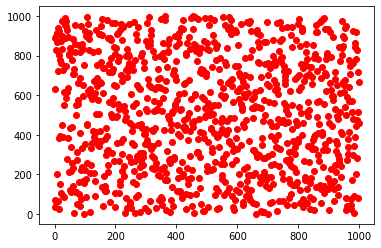

In [7]:
plt.plot(lst, 'ro')
plt.show()

In [23]:
def insertion_sort(lst):
      for i in range(1, len(lst)): #n-1
            for j in range(i,0,-1): #sum(i)
                  if lst[j] < lst[j-1]: #sum(i)
                        lst[j-1], lst[j] = lst[j], lst[j-1] # <sum(i)
                        #lst[j], lst[j-1] = lst[j-1], lst[j]
                  else:
                        break

In [25]:
insertion_sort(lst)

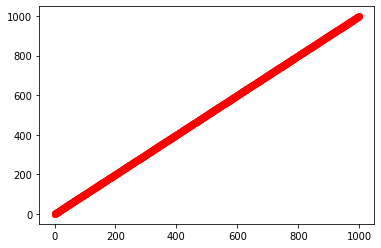

In [26]:
plt.plot(lst, 'ro')
plt.show()

In [17]:
import timeit
import random
times = [timeit.timeit(stmt='insertion_sort(lst)',
                        setup='lst=list(range({})); random.shuffle(lst)'.format(size),
                        globals=globals(),
                        number=1)
           for size in range(100, 5000, 250)]

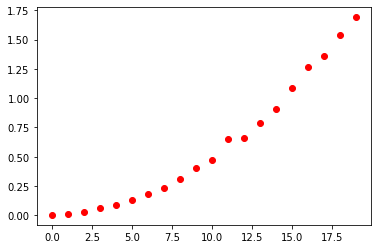

In [19]:
plt.plot(times, 'ro')
plt.show()

- 3 * sum(n) + 3n - 1
- So basically just O(n^2)

- Insertion and bubble sort are "in-place" sorts becasuse they just switch values around and no new lists are created
- Are they both stable sorts (ie. original order of equal values is preserved)
    - Bubble is stable because equal values are not swaped
    - Intertion is the same as above